In [145]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
sns.set()
import warnings 
warnings.filterwarnings("ignore")

# 1 - Business Problem
Implement a KNN model to classify the animals in to categorie

# 2 - Data collection and description

In [146]:
df = pd.read_csv("D:Harsha/Data sciences/Assignments/Assignment_13_KNN/Zoo.csv")

In [147]:
df1 = df.copy()

In [148]:
df1.head(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [149]:
df1.tail(10)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
92,tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
93,vampire,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
94,vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [150]:
df1.shape

(101, 18)

In [151]:
df1.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [152]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [153]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [154]:
df1.isnull()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [155]:
df1.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

# 3 - Data visualization

Text(0, 0.5, 'Count')

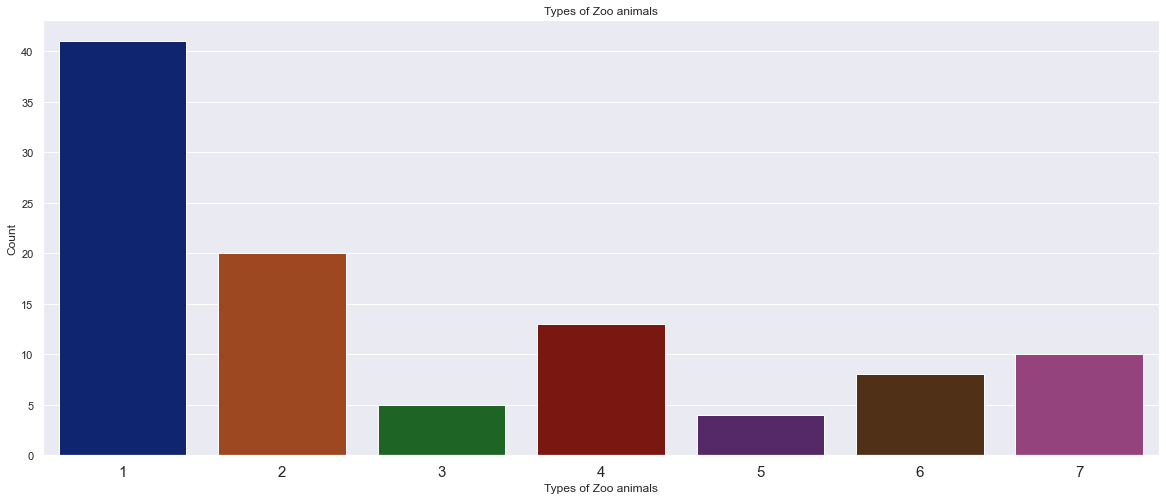

In [156]:
plt.figure(figsize=(20, 8))
sns.countplot(data= df1, x="type",palette = "dark")
plt.xticks(rotation = 0, size = 15)
plt.title("Types of Zoo animals")
plt.xlabel("Types of Zoo animals", fontsize=12)
plt.ylabel("Count", fontsize=12)

### As shown in the graphs above, highest number of animals available in Zoo are Type 1 followed by 2, 4 and 7 respectively

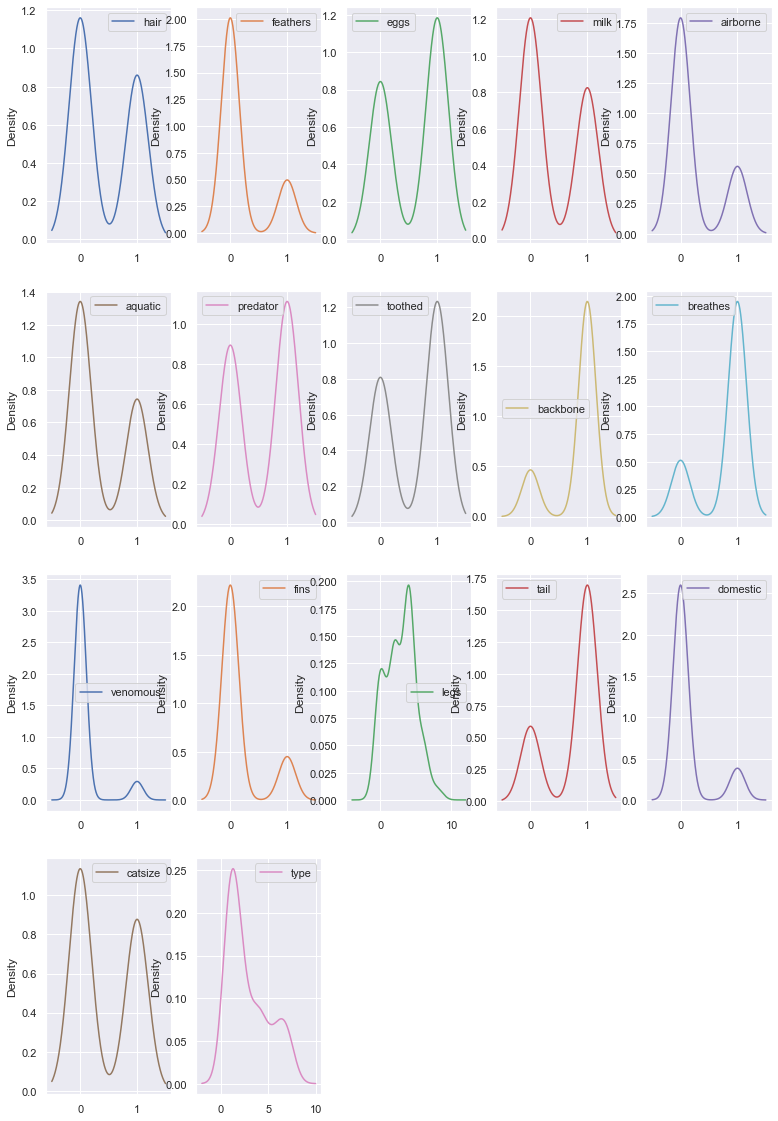

In [157]:
df1.plot(kind='density', subplots=True, layout=(4,5), 
         figsize=(13,20), sharex=False, sharey=False)
plt.show()

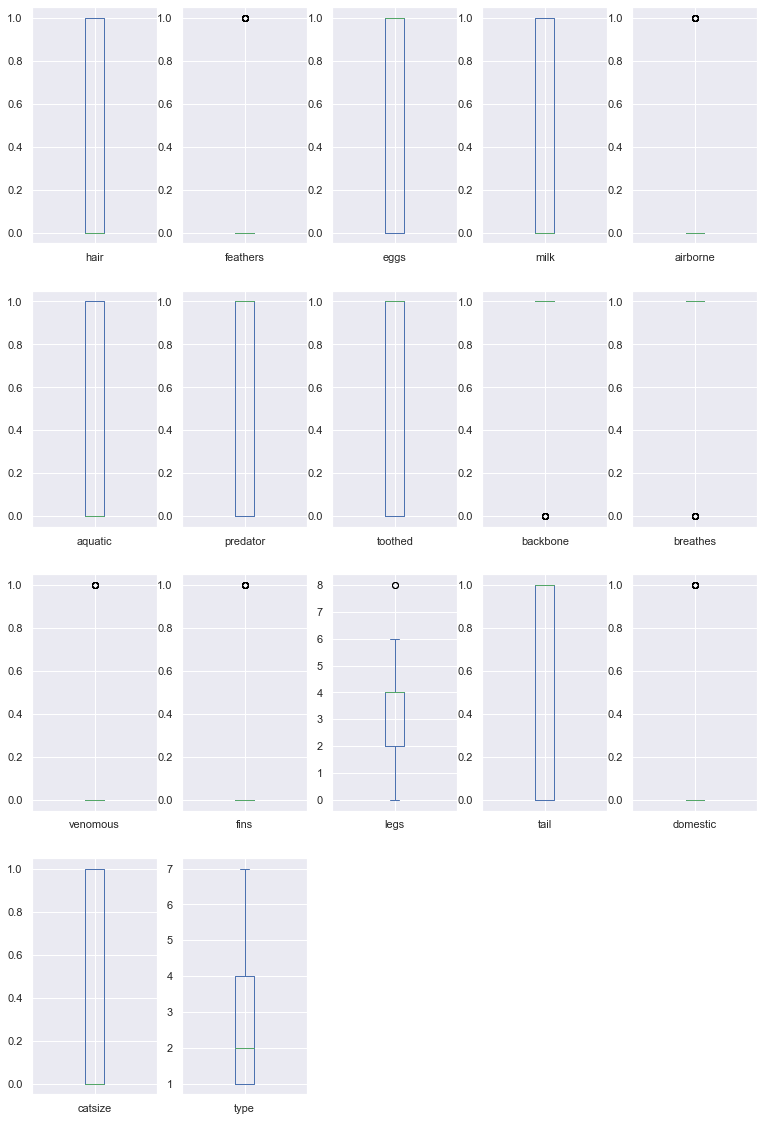

In [158]:
df1.plot(kind='box', subplots=True, layout=(4,5), 
         figsize=(13,20), sharex=False, sharey=False)
plt.show()

### As shown in the graphs above, majority of the variables are evenly distributed amongst the animals. However, some of the variables like airborne, backbone, breathes, venomous, fins, tail and domestic is not evenly distributed (i.e. majority of animals either have these variable or don’t)

# 4 - Finding correlation between the variables in the data

In [159]:
cor = df1.corr(method='pearson')

<AxesSubplot:>

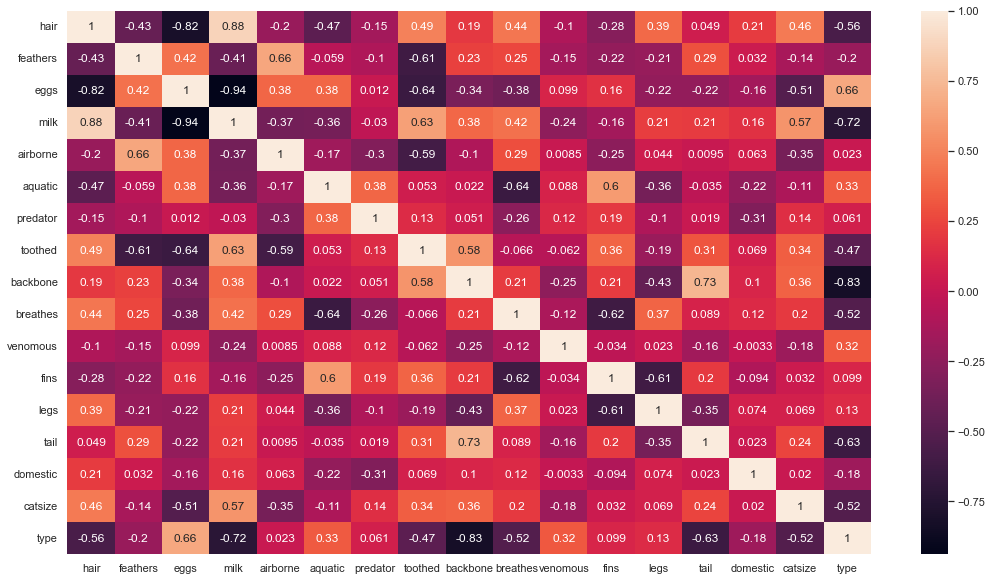

In [160]:
plt.figure(figsize=(18,10))
sns.heatmap(cor,annot=True)

In [161]:
cor.style.background_gradient(cmap='coolwarm')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


### As seen in the above graph, there is a high correlation exists between some of the variables. We can use PCA to reduce the highly correlated variables

Text(0.5, 1.0, 'Correlation with zoo animal type \n')

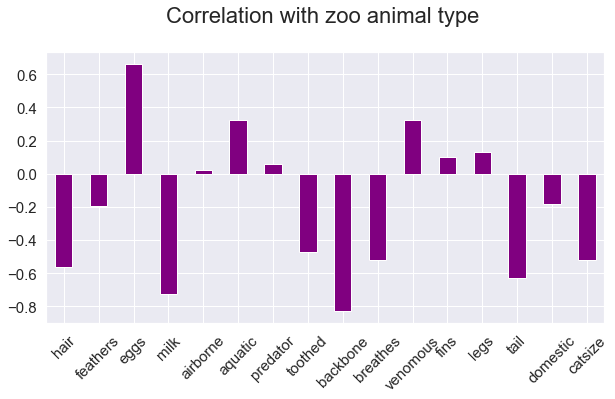

In [162]:
Df = df1.iloc[:,:-1]

correlations = Df.corrwith(df1.type)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (10, 5), 
        fontsize = 15, 
        color = 'purple',
        rot = 45, grid = True)
plt.title('Correlation with zoo animal type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

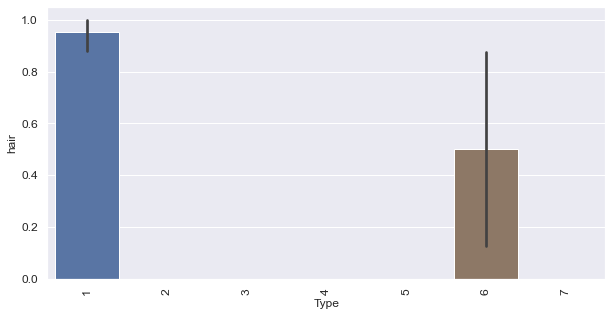

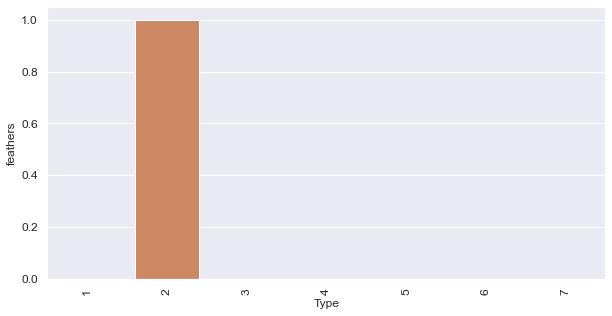

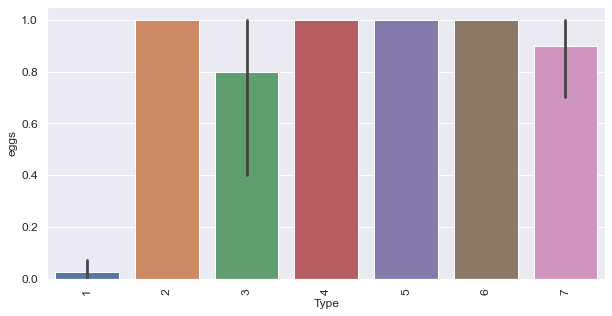

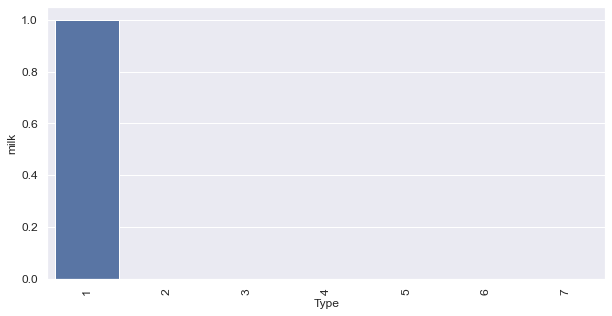

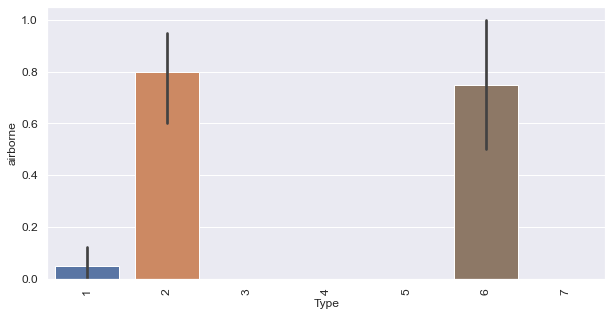

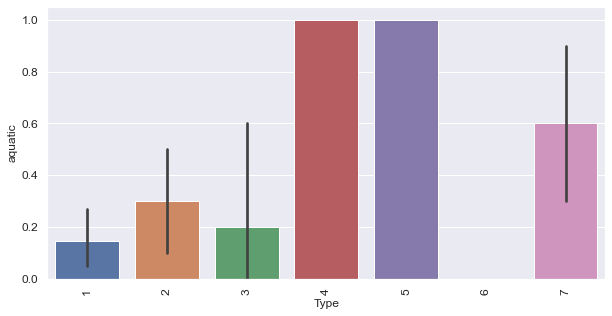

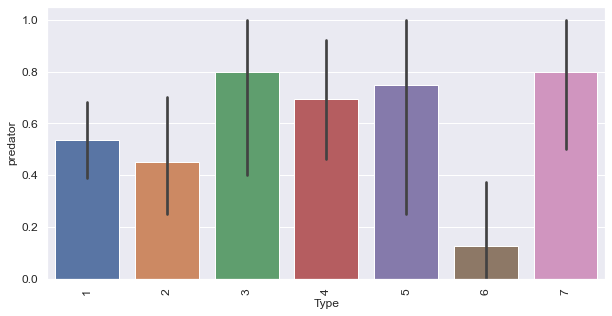

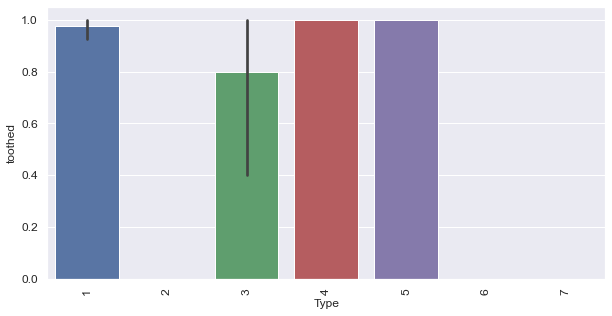

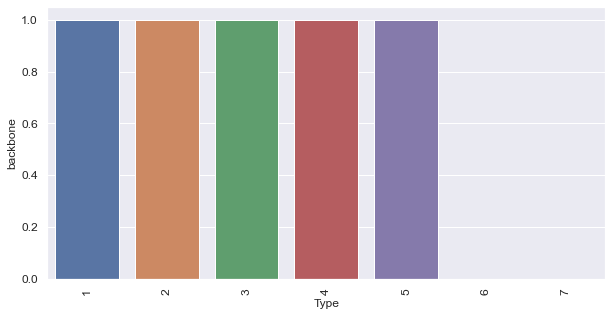

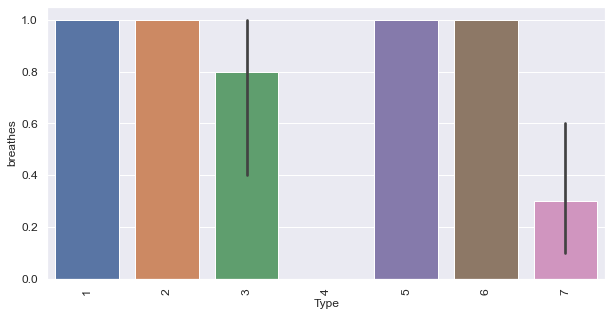

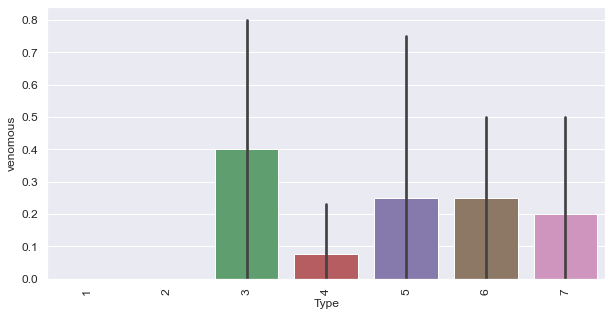

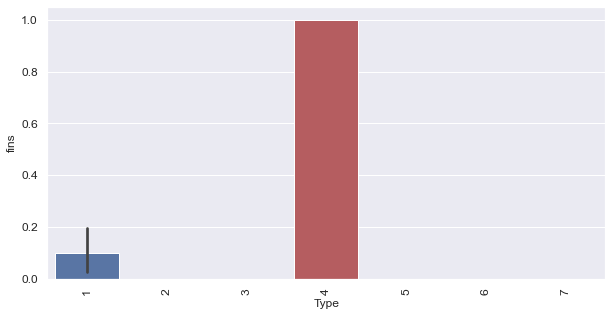

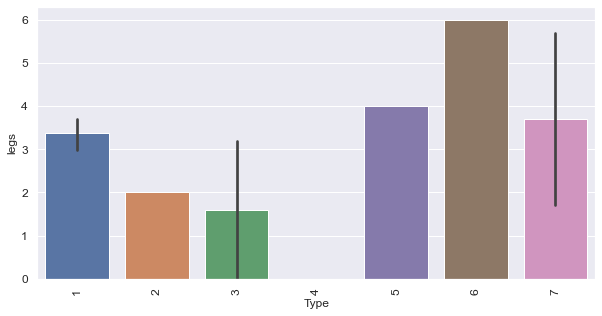

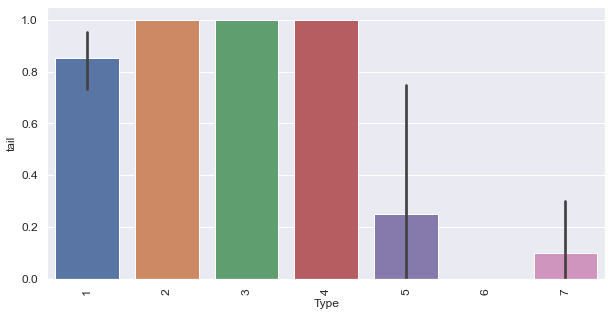

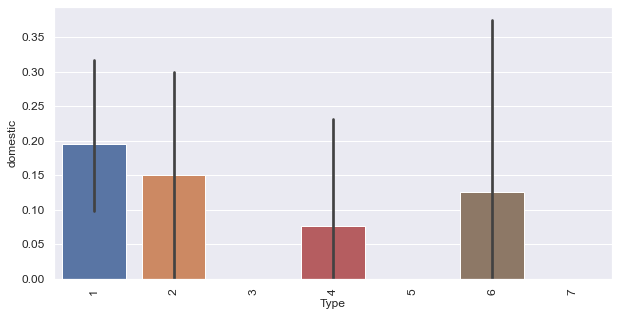

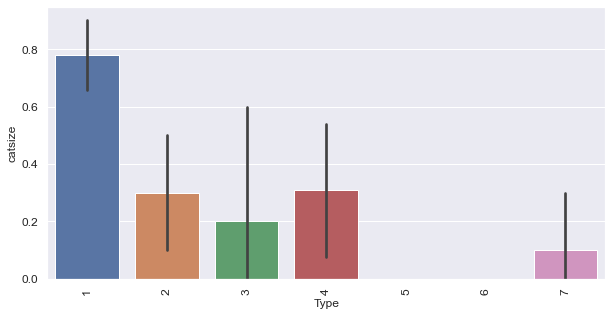

In [163]:
for i in df1.columns[1:-1]:
    plt.figure(figsize=(10,5))
    sns.barplot(x = 'type', y= i,data =df1)
    plt.xticks(rotation = 90, size = 12)
    plt.yticks(size = 12)
    plt.xlabel('Type',fontsize=12)
    plt.ylabel(i, fontsize=12)
    plt.show()

<AxesSubplot:xlabel='catsize', ylabel='count'>

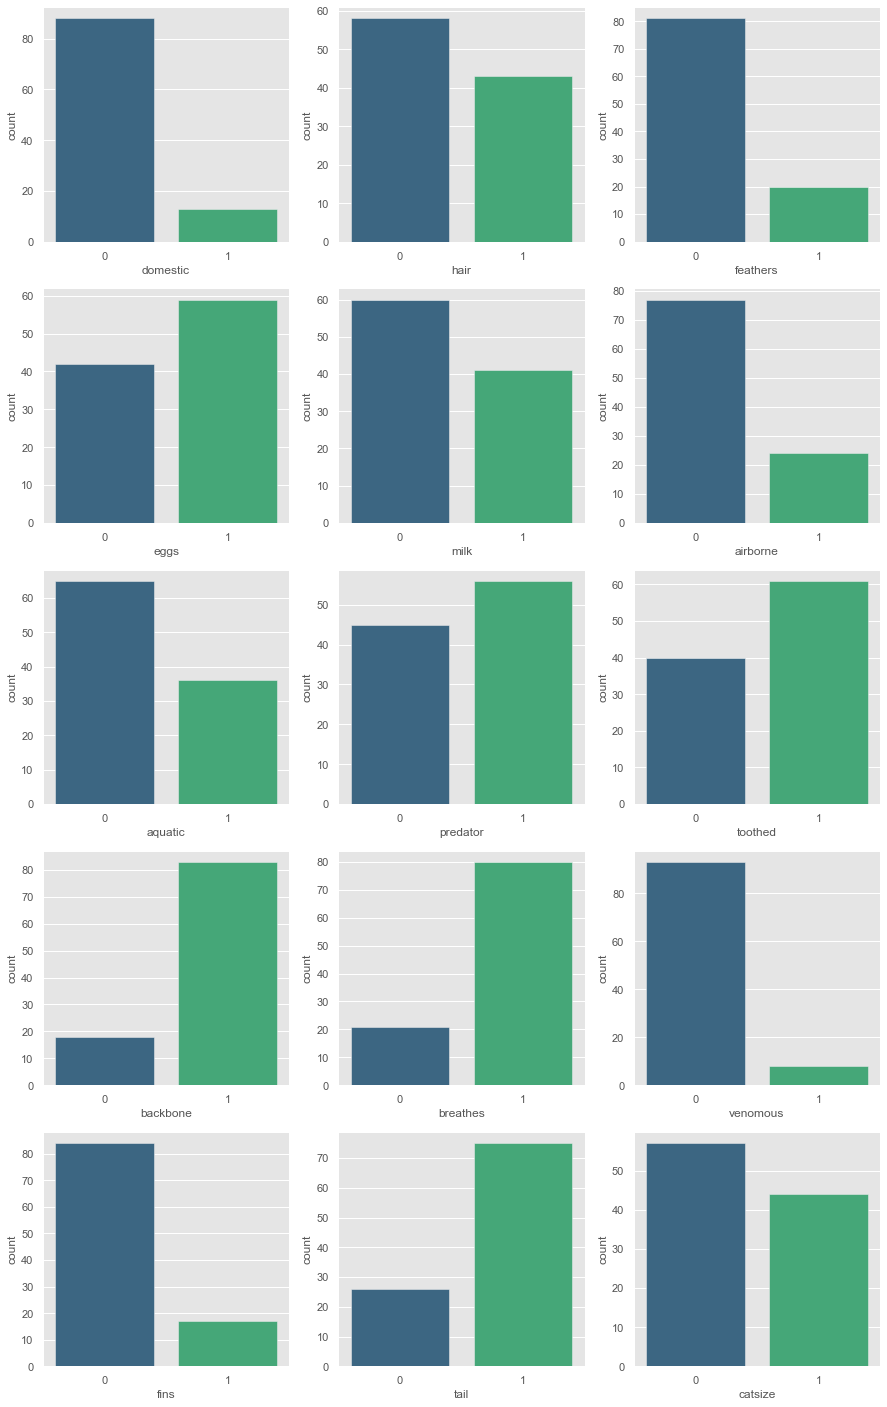

In [164]:
plt.style.use("ggplot")
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(df1["domestic"], palette="viridis", ax=ax[0,0])
sns.countplot(df1["hair"], palette="viridis", ax=ax[0,1])
sns.countplot(df1["feathers"], palette="viridis", ax=ax[0,2])

sns.countplot(df1["eggs"], palette="viridis", ax=ax[1,0])
sns.countplot(df1["milk"], palette="viridis", ax=ax[1,1])
sns.countplot(df1["airborne"], palette="viridis", ax=ax[1,2])

sns.countplot(df1["aquatic"], palette="viridis", ax=ax[2,0])
sns.countplot(df1["predator"], palette="viridis", ax=ax[2,1])
sns.countplot(df1["toothed"], palette="viridis", ax=ax[2,2])

sns.countplot(df1["backbone"], palette="viridis", ax=ax[3,0])
sns.countplot(df1["breathes"], palette="viridis", ax=ax[3,1])
sns.countplot(df1["venomous"], palette="viridis", ax=ax[3,2])

sns.countplot(df1["fins"], palette="viridis", ax=ax[4,0])
sns.countplot(df1["tail"], palette="viridis", ax=ax[4,1])
sns.countplot(df1["catsize"], palette="viridis", ax=ax[4,2])

# 5 - KNN

### 5.1 Finding optimal number of K

In [165]:
zoo = df1.drop('animal name', axis = 1)
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [166]:
x = zoo.drop('type' , axis = 1)
y = zoo['type']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 0)

In [168]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (75, 16)
Shape of X_test:  (26, 16)
Shape of y_train:  (75,)
Shape of y_test:  (26,)


In [169]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [170]:
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

Text(0.5, 1.0, '-value VS Accuracy')

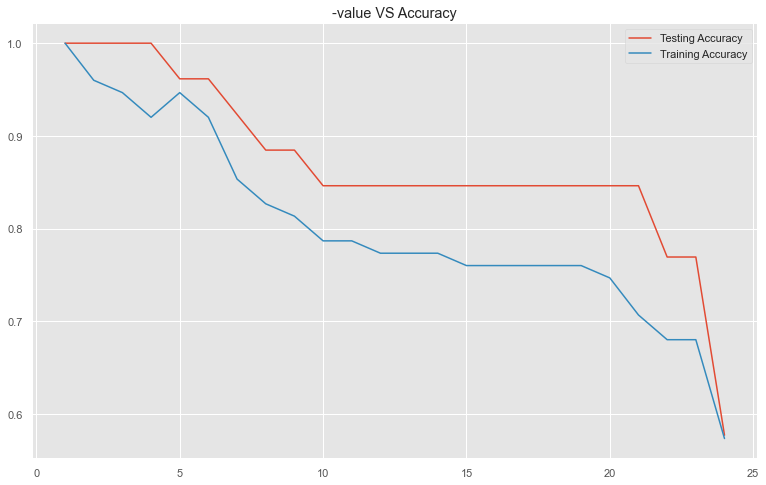

In [171]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')

In [172]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [173]:
pred = model.predict(X_test)

In [174]:
acc= accuracy_score(y_test,pred)
print("The accuracy is  {}".format(acc))

The accuracy is  0.9615384615384616


### As shown in the graph, with K=5 we can achieve accuracy of 96%.

Classification Report                precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



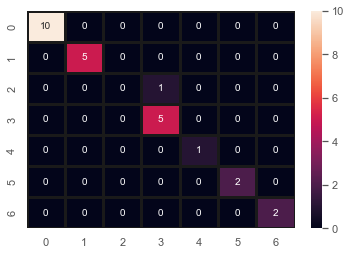

In [175]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred))

In [176]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


Text(0, 0.5, 'Error Rate')

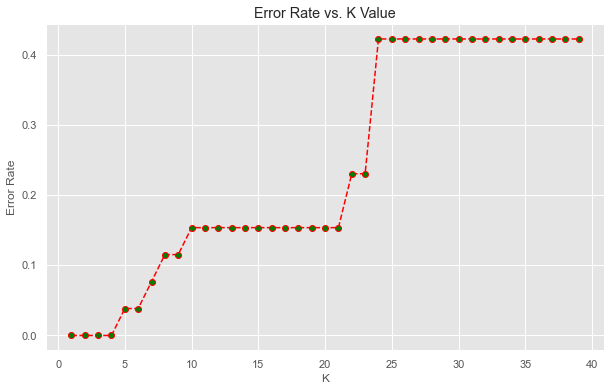

In [177]:
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict=knn.predict(X_test)
    err_rate.append(np.mean(predict!=y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

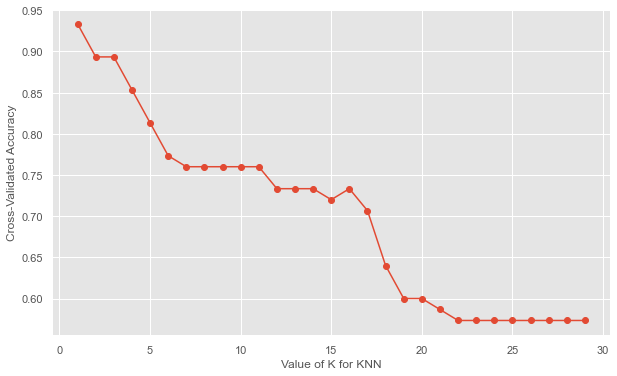

In [178]:
k_range = range(1, 30) # choose k between 1 to 31
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores, marker ="o")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### 5.2 Applying the algorithm

In [179]:
kf = KFold(n_splits=15)
grid_params ={
    'n_neighbors':[1,2,3,4,5,6],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10, cv=6,n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

Fitting 6 folds for each of 24 candidates, totalling 144 fits


In [180]:
gs_results.best_score_

0.9476495726495727

In [181]:
gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [182]:
model_final = gs_results.best_estimator_

In [183]:
pred_final = model_final.predict(X_test)
acc_final= accuracy_score(y_test,pred_final)
print("The accuracy is  {}".format(acc_final))

The accuracy is  1.0


Classification Report                precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



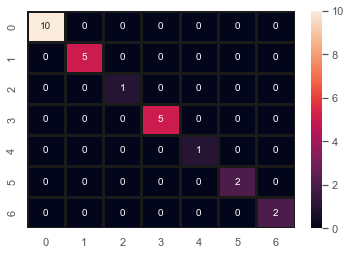

In [184]:
sns.heatmap(confusion_matrix(y_test, pred_final),
            annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred_final))

In [185]:
acc_final.mean()

1.0

In [186]:
acc_final.std()*2

0.0

# 6 - Conclusion

### Support Vector Machine Accuracy: 100%